### Convolution Neural Network

### Mnist Dataset

<br>

![image](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

##### Deep Neural Network

(60000, 28, 28)


<Figure size 864x720 with 0 Axes>

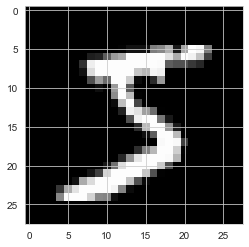

(28, 28) ()
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 25

In [10]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import Model, Input, layers
from tensorflow.keras import losses, optimizers
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

plt.figure(figsize=(12, 10))

batch_size = 4096
num_classes = 10
epochs = 20

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

plt.figure()
plt.imshow(x_train[0], cmap='gray')
plt.show()

print(x_train[0].shape, y_test[0].shape)
print(x_train[0],"\n", y_test[0])

In [16]:
print(x_train.shape)
x_train.reshape(60000, x_train.shape[1]*x_train.shape[2]).shape

(60000, 28, 28)


(60000, 784)

In [20]:
x_train = x_train.reshape(60000, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# 이 위까지는 픽셀별 값이 0~255
x_train /= 255
x_test /= 255
# 이제 표준화를 해서 픽셀별 값을 0~1
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


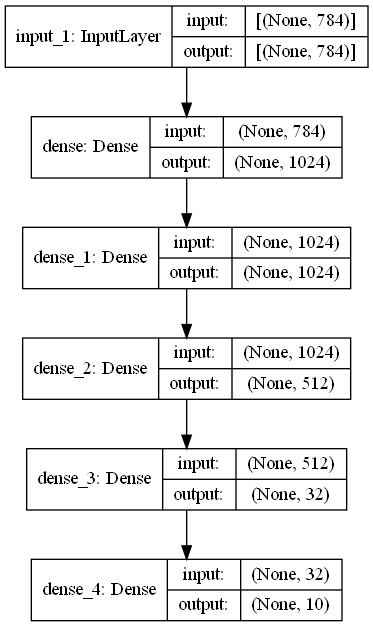

In [21]:
import tensorflow.keras

# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)

# model generation
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils

# functionnal API
inputs = Input(x_train[0].shape)
x = layers.Dense(1024, activation = 'relu')(inputs)
x = layers.Dense(1024, activation = 'relu')(x)
x = layers.Dense(512, activation = 'relu')(x)
x = layers.Dense(32, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)

model = Model(inputs, outputs)

utils.plot_model(model, show_shapes = True)

In [23]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
"""
history = model.fit(x_train, y_train,
                    batch_size=batch_size*10,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
"""
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/20
54000/54000 [==============================] - 548s 10ms/step - loss: 0.8695 - accuracy: 0.8326 - val_loss: 1.0819 - val_accuracy: 0.6512ss: 0 - ETA: 8:53 - l - ETA: 8:50 - los - ETA: 8:48 - l - ETA: 8:47 - loss: 0.6875 - accuracy: 0.83 - ETA: 8:47 - loss: 0.687 - ETA: 8:45 - loss: 0.6921 - accuracy - ETA: 8:45 - ETA: 8:42 - loss: 0.7048 - accuracy: 0. - ETA: 8:42 - loss: 0.7046 - accuracy: 0. - ETA: 8:41 - l - ETA: 8:37 - loss: 0.6943  - ETA: 8:36 - ETA: 8:34 - loss: 0.700 - ETA: 8:33 - loss: 0.6979 - accuracy - ETA: 8:30 - loss: 0.6876  - ETA: 8:28 - loss: 0.6830 - accuracy: 0. - ETA: 8:28 - loss: 0.6815 - accuracy: 0. - ETA: 8:28 - los - - ETA: 7:23 - loss: 0.717 - ETA: 7:22 - loss: 0.7175 - accuracy - ETA: 7:22 - loss: 0.7169  - ETA: 7:21 - ETA: 7:18 - loss: 0.7175 - accura - ETA: 7:17 - loss: 0 - E - ETA: 7:15 - ETA: 7:13 - loss: 0.7139 - accura - ETA: 7:13 - loss: 0.7128 - accuracy: 0. - ETA: 7:13 - loss: 0.7124 -  - - ETA: 7:05 - loss: 0.7 - ETA: 7:04 - loss: 0.7065 -

39529/54000 [====================>.........] - ETA: 2:24 - loss: 1.3010 - accuracy: 0.7475 ETA: 8:40 - loss: 1.2257 - accura - ETA: 8:43 - loss: 1.2259 - accuracy:  - ETA: 8:43 - - ETA: 8:51 - loss: 1.0719 - accuracy: 0. - ETA: 8:51 - ETA: 8:34 - loss: 1.5270 - ac - ETA: 8:33 - loss: 1.5 - E - ETA: 8:20 - loss: 1.2579 - accuracy: 0. - ETA: 8:20 - loss: 1.2549 - accuracy - ETA: 8:19 - loss: 1.2095 - accu - ETA: 8:18 - loss: 1.2711 - accuracy: 0. - ETA: 8:18 - loss: 1.2673 - ac - ETA: 8:17 - l - ETA: 8:16 - - ETA: 8:15 - loss: 1.5138 - ac - ETA: 8:15 - loss: 1.4943 - ac - ETA: 8: - ETA: 8:07 - loss: 1.3927 - accuracy: 0. - ETA: 8:06 - loss: - ETA: 8: - ETA: 8:02 - loss: 1.3411 - accuracy: 0.78 - ETA - ETA: 8:02 - loss: 1.4723  - ETA: 8:00 - loss: 1.4503 - accu - ETA - ETA: 7:56 - loss: 1.3994 - accura - ETA: 7:56 - l - ETA: 7:56 - - ETA: 7:55 - loss: 1.3758 - accura - ETA: 7:55 - loss: 1.3707 -  - ETA: 7:54 - loss: 1.3629 - accuracy: 0. - ETA: 7:54 - loss: 1.3616 - ac - ETA: 7:54 - loss:

54000/54000 [==============================] - 546s 10ms/step - loss: 1.4119 - accuracy: 0.7119 - val_loss: 5.3455 - val_accuracy: 0.63581 - ETA - ETA: 2:18 - loss: 1.3021 - accuracy: 0. - ETA: 2:18 - loss: 1.3020 - accuracy:  - ETA: 2:18 - loss: 1.301 - ETA: 2:17 - loss: 1.3035  - ETA: 2:17 - loss: 1.3038 - accuracy: 0.74 - ETA: 2:17 - loss: 1.3037 - accu - ETA: 2:16 - - ETA: 2:14 - loss: 1.3071  - ETA: 2:14 - loss: 1.3346 - accuracy: 0.74 - ETA: 2:14 - loss: 1.3344 - accu - ETA: 2: - ETA: 2:12 - loss: 1.3378 -  - ETA - ETA: 2:08 - loss: 1.3381 - accu - ETA: 2:08 - loss: 1.3381 - accuracy:  - ETA: 2:05 - loss: 1.3383 - ac - ETA - ETA: 2:02 - loss: 1.3369 - accu - ETA: 2:02 - loss: 1.3370 - ac - ETA: 2:02 - loss: 1.3370 - accuracy:  - ETA: 2:01 - loss: 1.3368 - accuracy - ETA: 2:01 - ETA: 1:59 - loss: 1.3377 -  - ETA: 1: - ETA: 1:57 - ETA: 1:54 - loss: 1.3349 - accu - ETA: 1:53 - loss: 1.3346 - accuracy - ETA:  - ETA: 1:51 - loss: 1.3313 - accuracy: 0.73 - ETA: 1:50 - l - ETA: 1:50 - l

42459/54000 [======================>.......] - ETA: 1:55 - loss: 1.9485 - accuracy: 0.4977 ETA: 8:41 - loss: 3.1635 - accura - ETA: 8:43 - loss: 2.8538 - ac - ETA: 8:38 - loss: 2.5018 - accuracy: 0. - ETA: 8:34 - loss: 2.3910  - - ETA: 8:43 - ETA: 8:42 - loss: 2.1651 - accuracy: 0. - ETA: 8:41 - loss: 2.1 - - ETA: 8:31 - loss: 1.4 - ETA: 8:30 - loss: 1.4074 - accu - ETA: 8:27 - l - ETA: 8:20 - loss: 3.9064 - accuracy: 0.61 - ETA: 8:20 - loss: 3.9026 -  - ETA: 8:20 - loss: 3.8536 - accuracy: 0. - E - ETA: 8:18 - loss: 3.4819 - accuracy - ETA: 8:18 - ETA: 8:16 - ETA: 8:15 - loss: 3.2575 - accuracy:  - ETA: 8:14 - loss: 3.2469 - accu - ETA: 8:14 - l - ETA: 8:13 - loss: 3.1891 - accura - ETA: 8:13 - loss: 3.1742 - accuracy: 0. - ETA: 8:13 - loss: 3.1686 - accuracy:  - ETA: 8:13 - loss: 3 - ETA: 8:13 - ETA:  - ETA: 8:11 - los - ETA:  - ETA: 8:08 - loss: 2.9346 - accuracy: 0.57 - ETA: 8:08 - loss: - - ETA: 7:42 - loss: 2.357 - ETA: 7:41 - loss: 2.3 - ETA: 7:40 - loss: 2.3 - ETA: 7: - ETA:  -

54000/54000 [==============================] - 551s 10ms/step - loss: 2.0282 - accuracy: 0.4508 - val_loss: 3.1925 - val_accuracy: 0.3728 1:42 - - ETA: 1:41 - loss: 1.9615 - accuracy - ETA: 1:40 - loss: 1.9612 - accuracy - ETA: 1:36 - loss: 1.9616 -  - ETA: 1:36 - loss: 1.9617  - ETA: 1:35 - loss: 1.961 - ETA: 1:35 - - ETA: 1:31 - loss: 1.9621 - accu - ETA: 1:31 - loss: 1.9623 - accura - ETA:  - ETA: 1:28 - loss: 1.9618 - accuracy:  - ETA: 1:28 - loss: 1 - ETA: 1:28 - loss: 1.9 - ETA: 1:27 - loss: 1.9618 - accuracy: 0. - ETA: 1:27 - ETA: 1:25 - E - ETA: 1:20 - loss: 1.9602 - ac - ETA - ETA: 1:01 - loss: 1.9609 - accura - ETA: 59s - loss: 1.9600 - accuracy: 0.47 - ET - ETA: 57s - lo - ETA: 56s - loss: 1.9593 - accuracy: 0.4 - ETA: 56s - loss: 1.9592 - accuracy: - ETA: 55s - ETA: 54s - loss: 1.9633 - accuracy: 0.4 - ETA: 54s - loss: 1.9633 - accuracy: 0.47 - ETA: 53s - loss: 1.9632 - accuracy: 0.47 - ETA: 53s - loss: 1.9631 - a - ETA: 53s - loss: 1.9633 - accurac - ETA: 52s - loss: 1.963

38080/54000 [====================>.........] - ETA: 2:28 - loss: 2.3004 - accuracy: 0.2770 ETA: 8:40 - loss: 1.6051 - accuracy: 0. - ETA: 8:35 - loss: - ETA: 8:11 - loss: 1.5623 - accuracy: 0. - ETA: 8:10 - loss: 1.5653 - accu - ETA: 8:11 - loss: 1.5870  - ETA: 8:10 - loss: 1.6 - ETA: 8:07 - loss: 1.5962 - accuracy - ETA: 8:24 - loss: 1.6359 - accura - ETA: 8:26 - loss: 1.6453 - accuracy:  - ETA: 8:25 - loss: 1.7715 - accura - ETA: 8:24 - loss: 1.7793  - ETA: 8:23 - loss: 1.7776  - ETA: 8:24 - loss: - ETA: 8:24 - loss: 2.0483 - accuracy - ETA: 8:22 - loss: 2.0496 - accuracy: 0. - ETA: 8:21 - loss: 2.037 - ETA: 8:21 - loss: 1 - ETA: 8:19 - loss: 1.9451 - accuracy: 0. - ETA: 8:18 - loss: 1.9432 - ac - ETA: 8:18 - loss: 1.9384 - ac - ETA: 8:19 - l - ETA: 8:19 - loss: 1.9268  - ETA: 8:18 - loss: 1.9118 - accuracy: 0. - - ETA: 8:18 - loss: 1.8946 - accu - ETA: 8:18 - loss: 1 - ETA: 8:21 - loss: 1.8 - ETA: 8:20 - loss: 1.8446 - accura - ETA: 8:20 - loss: 1.8398 - accura - ETA: 8:21 - loss: 1

54000/54000 [==============================] - 506s 9ms/step - loss: 2.2839 - accuracy: 0.2423 - val_loss: 2.1919 - val_accuracy: 0.15602:27 - loss: 2.2995 - accuracy: 0.27 - - ETA: 2:21 - loss: 2.2960 - accuracy: 0. - ETA: 2:21 - loss: 2.2960 - accuracy - ETA: 2:21 - loss: 2.2959 - accuracy: 0. - ETA: 2:21 - loss: 2.2957 - accuracy: 0. - ETA: 2:20 - loss: 2.2957 - accuracy: 0. - ETA: 2:20 - loss: 2.2957 - accu - ETA: 2:20 - loss: 2.2955 - accu - ETA: 2:20 - los - ETA: 2:19 - loss: 2.2943 - accuracy: 0.27 - ETA: 2:19 - loss: 2.2943 - accuracy: 0. - ETA: 2:19 - loss: 2.2943 -  - ETA: 2:18 - loss: 2 - ETA: 2:16 - loss: 2.2923 - accura - ETA: 2:16 - loss: 2.2921 - accuracy - ETA: 2:16 - loss: 2.2920 - accuracy: 0. - ETA: 2:16 - loss: 2.2920 - accuracy - ETA: 2:15 - loss: 2.2917 -  - ETA: 2:15 - loss: 2.2912  - ETA: 2:15 - loss: 2.2908 - accuracy: 0. - ETA: 2:14 - loss: 2.2908 - accuracy: 0. - ETA: 2:14 - loss: 2.2906 - accura - ETA: 2:13 - loss: 2.2896 - accu - ETA: 2:12 - loss: 2.2895 - 

24707/54000 [============>.................] - ETA: 4:16 - loss: 2.1787 - accuracy: 0.1739 ETA: 7:31 - loss: 2.2297 - accuracy: 0. - ETA: 7:37 - los - ETA - ETA: 8:37 - loss: 2.2038 - ac - ETA: 8:31 - loss: 2.1960 -  - ETA: 8:26 - loss: 2.1962 - accuracy: 0. - ETA: 8:25 - loss: 2.1919  - ETA: 8:21 - loss: 2.1948 - accuracy:  - ETA: 8:21 - loss: 2.1937 -  - ETA: 8:20 - loss: 2.1875 - accuracy: 0. - E - ETA: 8:16 - loss: 2.1900 - accuracy: 0. - ETA: 8:15 - loss: 2 - ETA: 8:14 - loss: 2.1922 - accuracy: 0. - ETA: 8:14 - loss: 2.1930 - accuracy: 0. - ETA: 8:13 - loss: 2.1937 - accuracy: 0. - ETA: 8:12 - loss: 2.1951  - ETA: 8:09 - loss: 2.1950 -  - ETA: 8:06 - loss: 2 - ETA: 8: - ETA: 8:04 - loss: 2.1845 - accuracy: 0. - ETA: 8:03 - loss: 2.1857 - accuracy:  - ETA: 8:02 - loss: 2.1855  - ETA: 8:00 - loss: 2.1 - ETA: 7:58 - loss: 2.1870 - accuracy: 0. - ETA: 7:58 - loss: 2.1861 - accuracy: 0. - ETA: 7:57 - loss: 2.1855 - accuracy: 0.15 - ETA: 7:57 - l - ETA: 7:55 - loss: 2.1848 - accuracy: 

54000/54000 [==============================] - 501s 9ms/step - loss: 2.2244 - accuracy: 0.1856 - val_loss: 2.3417 - val_accuracy: 0.2000TA: 4:14 - loss: 2.178 - ETA: 4:13 - loss: 2.1784 - accuracy:  - ETA: 4:13 - loss: 2.1782 - accuracy: 0. - ETA: 4:13 - loss: 2.1783 - ac - ETA: 4:13 - loss: 2.1784 -  - ETA: 4:12 - l - ETA: 4:10 - loss: 2.1777 - accuracy: 0.17 - ETA: 4:10 - loss: 2.1777 - accuracy: 0.17 - ETA: 4:10 - loss: 2.1777 - accuracy - ETA: 4:10 - loss: 2.1 - ETA: 4:09 - loss: 2.1775 - accuracy: 0.17 - ETA: 4:09 - loss: 2.1776 - accura - ETA - ETA: 4:07 - loss: 2.1773 -  - ETA: 4:06 - loss: 2.1773 -  - - ETA: 4:04 - loss: 2.176 - ETA: 4:03 - loss: 2.1760 - accu - ETA: 4:02 - loss: 2.1760 - accuracy: 0. - ETA: 4:02 - loss: 2.1759 - accuracy: 0.17 - ETA: 4:02 - loss: 2.176 - ETA: 4:02 - loss: 2.1757 - accuracy:  - ETA: 4:02 - loss: 2.1757 - accura - ETA: 4:01 - loss: 2.1753 - accuracy - ETA: 4:01 - loss: 2.1753 - accuracy:  - ETA: 4:01 - loss: 2.1754 - accuracy - ETA: 4:01 - los -

24963/54000 [============>.................] - ETA: 4:12 - loss: 2.2116 - accuracy: 0.1462 ETA: 7:19 - loss: 2.0904 - accu - ETA: 7:33 - loss: 2.0901 - accuracy: 0. - ETA: 7:34 - loss: 2.0813 - accuracy: 0. - ETA: 7:33 - loss: 2.1187 - accu - ETA: 7:33 - loss: 2.0956 -  - ETA: 7:32 - l - ETA - ETA: 7:50 - loss: 2.0380 - accuracy: 0.20 - ETA: 7:49 - loss: 2.0398  - ETA: 7:47 - loss: 2.0388 - accuracy: 0. - ETA: 7:46 - loss: 2.0421 - accuracy: 0. - ETA: 7:46 - loss: 2 - ETA: 7:42 - loss: 2.0394 - accuracy - ETA: 7:39 - loss: 2 - ETA: 7:40 - loss: 2.031 - ETA: 7:34 - loss: 2.0154 - accuracy: 0.21 - ETA: 7:34 - ETA: 7:25 - loss: 2.009 - ETA: 7:24 - loss: 2.0076 - accuracy: 0. - ETA: 7:24 - loss: 2.0086 - accuracy:  - ETA: 7:24 - loss: 2.007 - ETA: 7:23 - loss: 2.0087 - accuracy: 0.21 - ETA: 7:23 - loss: 2.0088 - accuracy: 0. - ETA: 7:23 - loss: 2.0098 - accuracy:  - ETA: 7:22 - loss: 2.0095 - accuracy: 0. - ETA: 7:22 - loss: 2.0087 - accuracy: 0.21 - ETA: 7:22 - loss: 2.0092 - accuracy: 0.

54000/54000 [==============================] - 490s 9ms/step - loss: 2.7414 - accuracy: 0.1494 - val_loss: 2.0755 - val_accuracy: 0.1783095 - accura - ETA: 4:09 - loss: 2.2261 - accura - ETA: 4:09 - loss: 2.2261  - ETA: 4:07 - loss: 2.2267 - accuracy:  - ETA: 4:07 - loss: 2.2267 - ac - ETA: 4:06 - loss: 2.2271  - ETA: 4:05 - loss: 2.227 - ETA: 4:04 - loss: 2.2270 - accura - ETA: 4:04 - loss: 2.227 - ETA: 4:02 - loss: 2.2276 - accuracy: 0. - ETA: 4:02 - loss: 2.2276 - accuracy:  - ETA: 4:02 - loss: 2.2277 - accuracy: 0.14 - ETA: 4:02 - loss: 2.2 - ETA: 4:01 - ETA: 4:00 - los - - ETA: 3:58 - loss: 2.2281 - accuracy: 0. - ETA: 3:58 - loss: 2.2280 - accura - ETA: 3:58 - loss: 2.228 - ETA: 3:57 - l - ETA: 3:56 - loss: 2 - ETA: 3:55 - ETA: 3:53 - loss: 2.2291 - accuracy:  - ETA: 3:53 - loss: 2.2292 - ac - ETA: 3:53 - loss: 2.229 - ETA - ETA: 3:50 - loss: 2.2296 - accuracy: 0. - ETA: 3:50 - loss: 2.2297 - accu - ETA: 3:49 - loss: 2.2297  - ETA: 3:49 - l - ETA: 3:48 - loss: 2.2 - E - ETA: 3:44

38637/54000 [====================>.........] - ETA: 2:19 - loss: 2.5395 - accuracy: 0.1651 ETA: 8:22 - loss: 2.0866 - accuracy - ETA: 8:21 - loss: 2.0847 - accuracy:  - ETA: 8: - ETA: 8:19 - loss: 2.0879 - accu - ETA: 8:17 - loss: 2.0896 - accuracy: 0. - ETA: 8:16 - loss: 2.0912 - accu - ETA: 8:14 - loss: 2.0856 - accura - ETA: 8:12 - loss: 2.0850  - ETA: 8:12 - loss: 2.0840 -  - ETA: 8:15 - loss: 2.0819  - E - ETA: 8:12 - loss: 2.0887 - accuracy:  - ETA: 8:11 - los - ETA: 8:09 - los - ETA: 8:07 - loss: 2.0888 - ac - ETA: 8:05 - loss: 2.0851 - accuracy: 0. - ETA: 8:04 - loss: 2.083 - ETA: 8:03 - loss: 2.0832 - accuracy:  - ETA: 8:02 - loss: 2.0812 - accuracy:  - - ETA: 8:06 - loss: 2.3110 - accuracy: 0.18 - ETA: 8: - ETA: 7:57 - loss: 2.2550 - accu - ETA: 7:56 - loss: 2.2522 - accuracy - ETA:  - ETA: 7:54 - loss: 2.2447 -  - ETA: 7:53 - loss: 2.2387 - accuracy - ETA: 7: - ETA: 7:48 - loss: 2.1888 - accuracy:  - ETA: 7:48 - loss: 2.1875 - ac - ETA: 7:47 - loss: 2.1852 - accuracy: 0. - E

54000/54000 [==============================] - 515s 10ms/step - loss: 2.4477 - accuracy: 0.1721 - val_loss: 8.2428 - val_accuracy: 0.2142A - ETA: 1:20 - loss: 2.4870 - accura - ETA: 1:19 - loss: 2.486 - ETA: 1:19 - loss: 2.486 - ETA: 1:18 - loss: 2.4865  - ETA: 1:16 - loss: 2.4847 - accuracy - ETA: 1:15 - los - ETA: 1:14 -  - ETA: 56s - loss: 2.4724 - accuracy: 0. - ETA: 56s - loss: 2.4723 - accuracy:  - ETA: 54s - loss: 2.47 - ET - ETA: 48s - loss: 2 - ETA: 47s - loss: 2.4659  - ETA: 47s  - ETA: 42s - loss: 2.4617 - accuracy: 0.16 - ETA: 42s - loss: 2.4616 - accuracy: 0.16 - ETA: 42s - loss: 2.4614 - accuracy: 0.167 - ETA: 42s - loss: 2.4613 - accuracy: 0.1 - ETA: 42s - loss: 2.4612 - accuracy - ETA - ETA: 39s - loss: 2.4584 - accuracy: 0.167 - E - ETA: 37s - loss: 2.45 - ETA: 35s - loss: 2.4538 - accuracy: 0.1 - ETA: 35s - loss: 2.4536 - accura - ETA: 35s - loss: 2.4528 - accuracy - ETA: 34s - loss: 2.4522 - accuracy: 0.16 - ETA: 34s - loss: 2.4522 - accuracy: 0 - ETA: 34s - loss: 2.

54000/54000 [==============================] - 532s 10ms/step - loss: 2.5055 - accuracy: 0.1781 - val_loss: 2.2039 - val_accuracy: 0.13576 - loss: 1.9881 - ac - ETA: 8:03 - loss: 1.9932 - accuracy: 0. - ETA: 8:03 - loss: 1.9934 - ac - ETA: 8:02 - loss: 1.9 - ETA: 8: - ETA: 8:03 - loss: 6.9400  - ETA: 8:02 - loss: 6.6299 - accuracy:  - ETA: 8:01 - loss: 6.5241 - accuracy: 0. - ETA: 8:00 - loss: 6.4625 - accuracy - ETA: 7:58 - l - ETA - ETA: 7:47 - loss: 5.1118 - accuracy:  - ETA: 7:47 - loss: 5.0665  - ETA: 7:44 - loss: 4.9308 - accu - ETA: 7:43 - ETA: 7:41 - loss: 4.6560 - accuracy: 0. - ETA - ETA: 7:37 - loss: 4.2479 - accuracy:  - ETA: 7:37 - loss: 4.2260 - ac - ETA: 7:36 - loss: - ETA: 7:35 - loss: 4.080 - E - ETA: 7:21 - loss: 3.3647  - ETA: 7:21 - loss: 3.3384 - accu - ETA:  - ETA: 7:17 - l - ETA: 7:16 - loss: 3.2328 - accuracy:  - ETA: 7:16 - ETA: 7:16 - loss: 3.1932 - accura - ETA: 7:15 - loss: 3.1822  - ETA: 7:15 - loss: 3.1634 - accuracy: 0. - ETA: 7:14 - loss: 3.1591 - ac - -

54000/54000 [==============================] - 554s 10ms/step - loss: 2.3551 - accuracy: 0.1839 - val_loss: 2.0211 - val_accuracy: 0.2090A:  - ETA: 9:00 - loss: 2.2310  - ETA: 8:58 - loss: 2.2332 -  - - ETA: 6:38 - loss: 2.4595 - accuracy: 0. - E - ETA: 6:36 - loss: 2.456 - ETA: 6:35 - loss: 2.4557 - ac - ETA: 6:34 - loss: 2.4553 - accuracy:  - ETA: 6:34 - loss: 2.4550 - accuracy: 0. - ETA: 6:34 - loss: 2.4548 - accuracy:  - - ETA: 6:32 - loss: 2.4523 - accura - - ETA: 6:30 - loss: 2.4498 - accuracy: 0. - ETA: 6:30 - loss: 2.4496 - accuracy - ETA: 6:29 - loss: 2.4492 - accuracy: 0.16 - ETA: 6:29 - loss: 2.4491 - accuracy - ETA: 6:29 - loss: 2.4486 - accuracy - ETA: 6:28 - loss: 2.4481 - accuracy: 0. - ETA: 6:28 - loss: 2.4480 - accuracy: 0. - ETA: 6:28 - loss: 2.4479 - accu - ETA: 6:27 - loss: 2.4 - ETA: 6:26 - loss: 2.445 - ETA: 6:25 - loss: 2.444 - ETA: 6:24 - loss: 2.4437 -  - ETA: 6:23 - loss: 2.4431 -  - ETA: 6:22 - loss: 2.4424  - ETA:  - ETA: 4:56 - loss: 2.3 - E - ETA: 4: - - E

54000/54000 [==============================] - 555s 10ms/step - loss: 2.3410 - accuracy: 0.1553 - val_loss: 2.3016 - val_accuracy: 0.1052ccuracy:  - ETA: 8:14 - loss: 2.0498  - ETA: 8:09 - loss: 2.0542 - accuracy: 0. - ETA: 8:08 - loss: 2.0446 - accuracy: 0.18 - ETA: 8:08 - loss: 2.0470 - ac - ETA: 8:08 - loss: 2.0475 - accuracy: 0. - ETA: 8:08 - loss: 2.047 - ETA: 8:06 - loss: 2.0635 - accu - ETA: 8:07 - loss: 2.0551 - accuracy: 0. - ETA: 8:06 - loss: 2.0552 - accuracy: 0. - ETA: 8:05 - loss: 2.0572 -  - ETA: 8:04 - loss: 2.0583 - ac - ETA - ETA: 8:02 - loss: 2.0629 - ac - ETA: 8:02 - loss: 2.0471 - accura - ETA: 7:56 - los - ETA: 7:56 - loss: - ETA: 7:53 - loss: 2.0432 - accuracy - ETA: 7:53 - loss: 2.0429 - accu - ETA: 7:52 - loss: 2.0 - ETA: 7:52 - - ETA: 7:46 - l - ETA: 7:46 - loss: 2.0 - ETA: 7:45 - loss: 2.0215 - ac - - ETA - ETA: 7:43 - loss: 2.0601 - accuracy: 0.19 - ETA: 7:43 - loss: 2.0603 - accu - ETA: 7:42 - loss: 2.0606 - accuracy: 0. - ETA: 7:42 - loss: 2.0609 - accura -

54000/54000 [==============================] - 501s 9ms/step - loss: 2.3017 - accuracy: 0.1121 - val_loss: 2.3041 - val_accuracy: 0.1052: 7:26 - loss: 2.3017 - accuracy:  - E - ETA: 7:24 - loss: 2 - ETA: 7:23 - loss: 2.3019 - accu - ETA:  - ETA: 5:03 - loss: 2.3017 - accuracy:  - ETA: 5:03 - loss: 2.3018 - accuracy: 0. - ETA: 5:03 - loss: 2.3017 - accuracy - ETA: 5:02 - loss: 2.301 - ETA: 5:02 - loss: 2 - E - ETA: 4:59 - loss: 2.3017 - accu - ETA: 4:59 - ETA: 4:57 - loss: 2.3 - ETA: 4:56 - loss: 2.3017 - accuracy: 0.10 - ETA: 4:56 - loss: 2.3017 - accura - ETA: 4:56 - loss: 2.3017 - accu - ETA: 4:56 - loss: 2.3018 - accuracy:  - ETA: 4:55 - l - ETA: 4:54 - loss: 2.3017 - accuracy:  - ETA: 4:54 - loss: 2.3017 - accuracy: 0. - ETA - ETA: 4:52 - loss: 2.3017 - accuracy: 0.10 - ETA: 4:52 - loss: 2.3017 - accuracy:  - ETA: 4:52 - loss: 2.3017 - accuracy: 0.10 - ETA: 4:52 - loss: 2.3017 - accura - ETA: 4:52 - loss: 2.3017 - accuracy: 0. - ETA: 4:48 - loss: 2.3017 -  - ETA: 4:28 - loss: 2.301

54000/54000 [==============================] - 535s 10ms/step - loss: 2.3018 - accuracy: 0.1119 - val_loss: 2.3017 - val_accuracy: 0.1052 6:43 - loss: 2.3260 - accura - - ETA: 7:04 - loss: 2.3076 - accuracy - ETA: 7:06 - loss: 2.3061 - accuracy - ETA: 7:08 - loss: 2.3070 - accura - ETA: 7:11 - loss: - ETA: 7:06 - ETA: 7:10 - l - ETA: 7:10 - loss: 2.3034 - ac - ETA: 7:09 - loss: 2.302 - ETA: 7:08 - loss: 2.3028 -  - ETA: 7:07 - loss: 2.3027 - accuracy: 0. - ETA: 7:07 - loss: 2.3029  - ETA: 7:08 - los - ETA: 7:08 - loss: 2.3031 - accuracy - ETA: 7:06 - loss: 2.3035 - accuracy - ETA: 7:06 - loss: 2.3036 - accuracy: 0. - E - ETA: 7:06 - loss: 2.3036 - accuracy: 0. - ETA: 7:06 - loss: 2.3036 - accura - ETA: 7:06 - loss: 2.3036 - accu - ETA:  - ETA: 7:01 - loss: 2.3 - ETA: 7:00 - loss: 2.3030 - accuracy: 0. - ETA: 7:00 - loss: 2.3030 - ac - ETA: 7:00 - l - ETA: 6:59 - loss: 2.3032 - accuracy - ETA: 6:59 - loss: 2.3033 - accuracy: 0. - ETA:  - ETA: 6:58 - loss: 2.3032 -  - ETA: 6:56 - loss: 2

54000/54000 [==============================] - 545s 10ms/step - loss: 2.3020 - accuracy: 0.1121 - val_loss: 2.3019 - val_accuracy: 0.1052:42 - loss: 2.2933 - accuracy: 0. - ETA: 8:40 - loss: 2.2952  - ETA: 8:31 - loss: 2.2940  - ETA: 8:31 - loss: 2.2981 -  - ETA: 8:26 - loss: 2.297 - ETA: 8:20 - loss: 2.2965 - accuracy: 0. - ETA: 8:19 - - E - ETA: 9:23 - loss: 2.2996 -  - ETA: 9:18 - loss: 2.300 - ETA - ETA: 8:13 - loss: 2.3014 - accuracy: 0. - ETA: 8:12 - loss: 2.3013 - accu - ETA: 8:11 - loss: 2.3014 -  - ETA: 8:09 - loss: 2.3009 - accuracy: 0. - ETA: 8:09 - loss: 2.3008 - accuracy: 0. - ETA: 8:08 - loss: 2.3009 - accuracy:  - ETA: 8:08 - loss: 2.300 - ETA: 8:03 - los - ETA: 8:02 - los - ETA: 8:14 - loss: 2.3017 - accuracy: 0. - ETA: 8:14 - loss: - ETA - ETA:  - ETA: 7:09 - ETA: 7:08 - loss: 2.3016  - E - ETA: 7:02 - loss: 2.3016 - ac - ETA: 7:00 - loss: 2 - ETA: 6:59 - loss: 2.3017 - accuracy:  - ETA: 6:58 - loss: 2.3017 - accuracy: 0. - ETA: 6:58 - loss: 2.3 - ETA: 6:55 - ETA: 6:54

54000/54000 [==============================] - 538s 10ms/step - loss: 2.3018 - accuracy: 0.1121 - val_loss: 2.3022 - val_accuracy: 0.1052 7:51 - loss: 2.3020 - accuracy: 0. - ETA: 7: - ETA: 7:49 - loss: 2.3022 -  - ETA: 7:49 - los - ETA: 7:35 - - ETA: 7:33 - loss: 2.3019 - accuracy - ETA: 7:32 - loss: 2.3019 - accuracy: 0.11 - ETA: 7:32 - loss: 2.3019 - accuracy: 0. - ETA - ETA: 7:30 - loss: 2.3019 - accuracy: 0.11 - ETA: 7:30 - loss: 2.3020 - accuracy: 0.11 - ETA: 7:30 - loss: 2 - ETA: 7:29 - loss: 2.3019 - accuracy - ETA: 7:28 - loss: 2.3019 - accura - ETA: 7:28 - loss: - ETA: 7:26 - loss: 2.3020 - accura - ETA: 7:26 - loss: 2.3020 - accu - E - ETA: 7:23 - loss: 2.3 - ETA: 7:15 - loss: 2.3019 - accuracy - ETA: 7:15 - loss: 2.3019 - ac - ETA: 7:15 - loss: 2.3020 - accuracy: 0. - ETA: 7:15 - loss: 2.3020 - accuracy: 0. - ETA: 7:14 - loss: 2.3020  - ETA: 7:09 - loss: 2.3019 - accuracy: 0. - ETA: 7:09 - loss: 2.3019 - accura - ETA: 7:09 - loss: - ETA: 7:08 - ETA: 7:04 - loss: 2.3 - ETA -

54000/54000 [==============================] - 517s 10ms/step - loss: 2.3019 - accuracy: 0.1127 - val_loss: 2.3018 - val_accuracy: 0.1115- ETA: 7:55 - loss: 2.3022 -  - ETA: 7:53 - loss: 2.3016 - accuracy - ETA: 7:52 - loss: - ETA: 7:49 - loss: 2.3012 -  - E - ETA: 7:42 - loss: 2.301 - ETA: 7:43 - loss: 2.3017 - accuracy: 0.11 - ETA - ETA: 7:46 - loss: 2.3018 - accuracy: 0. - ETA: 7:46 - loss: 2.3018 - accuracy:  - ETA: 7:45 - los - ETA: 7:37 - loss: 2.3016 - accu - ETA: 7:37 - loss: 2.3016 - accuracy: 0. - ETA: 7:36 - loss: 2.3017  - ETA: 7:35 - loss: 2.3018 - accuracy: 0.11 - ETA: 7:35 - loss: 2 - ETA: 5:51 - loss: 2 - - ETA: 5: - ETA: 5:34 - loss: 2.3 - ETA: 4:54 - loss: 2 - ETA: 4:49 - loss: - ETA: 4:45 - loss: 2.3020 -  - ETA: 4:45 - loss: 2.3021 - accuracy: 0. - ETA: 4:45 - loss: 2.3021 - accuracy - ETA: 4:45 - loss: 2.3021 - accuracy: 0. - ETA: 4:44 - loss: 2.3021 - accuracy: 0. - ETA: 4: - ETA: 4:40 - los - ETA: 3:44 - loss: 2.3019 - accuracy:  - ETA: 3:42 - loss: 2.3019 - accu

47995/54000 [=========================>....] - ETA: 54s - loss: 2.3018 - accuracy: 0.11099 ETA: 8:21 - loss: 2.3016 - accuracy: 0. - ETA - ETA: 8:08 - loss: 2.3022 - ac - ETA: 8:07 - loss: 2.3024 - accuracy: 0. - ETA: 8:07 - loss: 2.3029 - accura - ETA: 8:05 - loss: 2.3028 - accura - ETA: 8:03 - los - ETA: 7:47 - l - ETA: 7:42 - loss: 2.3017 - accura - ETA: 7:42 - loss: 2.3017 - accuracy - ETA - ETA: 7:39 - ETA:  - ETA: 5: - ETA: 5:09 - loss: 2.3021 -  - ETA: 5:06 - loss: 2.3020 - ac - ETA: 5:06 - loss: 2 - ETA: 5:05 - loss: 2.3020 - accuracy: 0. - - ETA: 4:38 - - ETA: 4:36 - loss: 2.3019 - accuracy: 0.11 - ETA: 4:32 - loss: 2.301 - ETA: 4:32 - loss: 2.3019 - accuracy: 0. - ETA: 4:32 - loss: 2.3019 - ac - ETA: 4:31 - loss: 2 - ETA: 4:31 - - ETA: 4:30 - loss: 2.3019 - accuracy - ETA: 4:30 - loss: 2.3019  - ETA: 4:29 - loss: 2.3 - ETA: 4:29 - loss: - ETA: 4:28 - loss: 2.3019 - accuracy: 0. - ETA: 4:28 - loss: 2.3019 - accura - ETA: 4:27 - loss: 2.3019 - accuracy: 0. - ETA: 4:27 - loss: 2

54000/54000 [==============================] - 488s 9ms/step - loss: 2.3018 - accuracy: 0.1114 - val_loss: 2.3026 - val_accuracy: 0.1052 2.3018 - accuracy: 0.11 - ETA: 52s - loss: 2.3018 - accuracy - ETA: 51s - loss: 2.3018 - accuracy:  - ETA: 49s - loss: 2.3018 - accu - ETA: 48s - loss: 2.3018 - accuracy - ETA: 47s - loss: 2.3018 - accuracy: 0.11 - ETA: 47s - loss: 2.3018 -  - ETA: 46s - loss: 2.3018 - ETA: 45s - loss: 2.3018 - accuracy: 0 - ETA: 45s - loss: 2.3017 - accuracy: 0.11 - ETA: 45s - loss: 2.3017 - accuracy: - ETA: 44s - loss: 2.3017 - accuracy: 0.1 - ETA: 44s - loss: 2.3017 - a - ETA: 43s - loss: 2.3017 - accuracy: 0. - ETA: 43s - loss: 2.3017 -  - ETA: 42s - loss: 2.3017 - ETA: 41s - loss: 2.301 - ETA: 40s - loss: 2.3017 - accuracy: 0. - ETA: 39s - loss: 2.3017 - accuracy - ETA: 39s - loss: 2.3017 - accuracy: 0.11 - ETA: 39s - loss: 2.3017 - accuracy: 0.11 - ETA: 39s - loss: 2 - ETA: 32s - loss: 2.3017 - accurac - ETA: 31s - loss: 2.3018 - a - ETA: 30s - loss: 2.3018 - ac

20950/54000 [==========>...................] - ETA: 4:26 - loss: 2.3019 - accuracy: 0.1115 ETA: 6:46 - loss: 2.3022  - ETA: 6:44 - loss: 2.2966 - accuracy: 0.10 - ETA: 6:44 - loss: 2.2959 - accuracy - ETA: 6:46 - loss: 2.2 - ETA: 6:54 - loss: 2.3014 - accuracy:  - ETA: 6:52 - loss: 2.3012 - accura - ETA: 6:50 - loss: 2.3042 - accuracy - ETA: 6:49 - loss: 2.3048 - accuracy: 0.08 - ETA: 6:49 - loss: 2.3039 - ac - ETA: 6:46 - loss: 2.3039  - ETA: 6:44 - loss: 2.3037 - accuracy: 0.10 - ETA: 6:44 - loss: 2.3038 - accuracy - ETA: 6:44 - loss: 2.3043 - accuracy: 0. - ETA: 6:43 - loss: 2.3047 - accuracy: 0. - ETA: 6:43 - loss: 2.3036 - accura - ETA: 6:44 - loss: 2.3037 - accuracy: 0. - ETA: 6:44 - loss: 2.3032 - accuracy: 0. - ETA: 6:44 - loss: 2.3031 - accura - ETA: 6:45 - loss: 2.3017 - accuracy: 0. - ETA: 6:45 - - ETA: 6:52 - loss: 2.3013 - accuracy: 0. - ETA: 6:52 - loss: 2 - ETA: 6:54 - loss: 2.3021 - accuracy: 0. - ETA: 6:54 - loss: 2.3012 - accuracy: 0. - ETA: 6:54 - los - ETA: 6:54 - l

40762/54000 [=====================>........] - ETA: 1:46 - loss: 2.3021 - accuracy: 0.1119 ETA: 4:25 - loss: - ETA: 4: - ETA: 4:23 - loss: 2.301 - ETA: 4:22 - loss: 2.3020 - accuracy: 0. - ETA: 4:22 - loss: 2.3019 - accuracy: 0. - ETA: 4:22 - l - ETA: 4:21 - E - ETA: 4:17 - loss: 2.3019 - ac - ETA: 4:16 - los - ETA: 4:15 - loss: 2.3019 -  - ETA: 4:15 - loss: 2.3019 - accura - ETA: 4:15 - loss: 2.3019 - accuracy: 0. - ETA: 4:14 - loss: 2.3019 - accu - ETA: 4:14 - loss: 2.3019 - accuracy - ETA: 4:14 - - ETA: 4:13 - loss: 2.3020 - accu - ETA: 4:13 - loss: 2.3020 - accuracy - ETA: 4:13 - loss: 2.3020  - ETA: 4:11 - loss: 2.3020 - accuracy: 0. - ETA: 4:11 - loss: 2.3020 - accu - ETA: 4:10 - loss: 2.3020 - accu - ETA: 4:10 - - ETA: 4:09 - loss: 2.3020  - ETA: 4:09 - loss: 2.3020 - accu - ETA: 4:08 - loss: 2.3020  - ETA: 4:08 - loss: 2.3020 -  - ETA: 4:08 - loss: 2 - ETA: 4:06 - loss: 2.3021 - accu - ETA: 4:06 - loss: 2.3021 - accuracy:  - ETA: 4:05 - loss: 2.3021 - accuracy - ETA: 4:05 - los

54000/54000 [==============================] - 466s 9ms/step - loss: 2.3019 - accuracy: 0.1120 - val_loss: 2.3018 - val_accuracy: 0.1052: 1: - ETA: 1:43 - loss: 2.3022  - ETA: 1:43 - loss: 2.3022 - accuracy: 0.11 - ETA: 1:43 - loss: 2 - ETA: 1:42 - loss: 2.3022 - accura - ETA - ETA: 1:17 - l - ETA: 1:02 - loss: 2.3020 - accuracy: 0. - ETA: 1:02 - loss: 2.3020  - ETA: 1:02 - - ETA: 1:01 - loss: 2 - ETA: 1:00 - loss: 2.3020 -  - ETA: 1:00 - loss - ETA: 59s - loss: 2.3021 - accur - ETA: 5 - ETA: 55s -  - ETA: 50s - loss: 2.3021 - accuracy: 0.112 - ETA: 50s - loss: - ETA: 49s - loss: 2.3021  - ETA: 48s - loss: 2.3020 - accuracy: 0. - ETA: 48s - loss: 2.3020 - accurac - ETA: 48s - loss: 2.3020 - accuracy: 0.111 - ET - ETA: 46s - loss: 2.3020 - - ETA: 45s - loss: 2.3020 - accuracy - ETA: 42s - loss: 2.3019 - accurac - ETA: 42s - loss: 2.3019 - acc - ETA: 41s - loss: 2.3019 - accuracy: 0.11 - ETA: 41s - loss: 2.3019 - accuracy: 0.11 - ETA: 41s - loss: 2.3019 - accuracy: 0.11 - ET - ETA: 39s -

54000/54000 [==============================] - 548s 10ms/step - loss: 2.3020 - accuracy: 0.1126 - val_loss: 2.3014 - val_accuracy: 0.1052 8:26 - loss: 2.3024 - accuracy:  - ETA: 8:26 - loss: 2.3023 - accuracy: 0. - ETA: 8:26 - loss: 2.3023 - accura - ETA: 8:25 - loss: 2.3024 - accuracy: 0. - ETA: 8:25 - ETA: 8:21 - loss: 2.3030 - accuracy - ETA: 8:21 - ETA: 8:21 - loss: 2.3031 - accu - ETA: 8:21 - loss: 2.3027  - ETA: 8:18 - loss: 2.3032 - ac - ETA:  - ETA: 7:21 - loss: 2.3 - ETA:  - ETA: 7:19 - E - ETA: 6:56 - loss: 2.3018 - accuracy:  - ETA:  - ETA: 6:54 - loss: 2.3018 -  - ETA: 6:40 - loss: 2.3018 -  - ETA: 6:39 - loss: 2.3018 - accura - ETA: 6:37 - loss: 2.3 - ETA: 6:37 - l - ETA: 6:28 - loss: 2.3019 - accuracy:  - ETA: 6:28 - loss: 2.3019 - accuracy: 0. - ETA: 6:27 - loss: 2.3019 - accuracy: 0.11 - ETA: 6:27 - ETA: 6:26 - - E - ETA:  - ETA: 6:09 - loss: 2.3018 -  - ETA: 6:09 - loss: 2.301 - ETA: 6:08 - loss: 2.3018  - ETA: 6:07 - loss: 2.301 - ETA: 6:07 - ETA: 6:06 - los - ETA: 6:

54000/54000 [==============================] - 535s 10ms/step - loss: 2.3018 - accuracy: 0.1115 - val_loss: 2.3020 - val_accuracy: 0.1052y: 0.11 - ETA: 8:39 - loss: 2.3047  - ETA: 8:43 - loss: 2.3042 - accuracy:  - ETA: 8:43 - loss: 2.3055 - accuracy - ETA: 8:42 - loss: 2.3060  - ETA: 8:38 - loss: 2.3077 -  - ETA: 8:40 - loss: 2.308 - E - ETA: 8:48 - loss: 2.3038 - accura - ETA: 8:49 - loss: 2.3036 - accuracy:  - ETA: 8:49 - ETA: 8:55 - loss: - ETA: 8:52 - - ETA: 8:50 - loss: 2.3016 - accuracy: 0.10 - ETA: 8:50 - loss: 2 - ETA: 8:35 - loss: 2.3013 - accuracy: 0. - ETA: 8: - ETA: 8:01 - loss: 2.3008 - accura - ETA: 8:00 - loss: 2.3009 - accuracy - ETA: 7:49 - - ETA: 7:37 - l - ETA: 7:35 - loss: 2.3015 - accuracy:  - - ETA: 7:30 - loss: 2.3015 - accuracy: 0. - ETA: 7:29 - loss: - ETA: 7:27 - loss: 2.3013 - accuracy:  - ETA: 7:27 - loss: 2.3013 - accuracy: 0. - ETA: 7:27 - loss: 2.3013 - accuracy: 0.11 - E - ETA: 7:26 - loss: 2.3013 - accuracy:  - E - ETA: 7:21 - loss: 2.3008 - ac - ETA: 

54000/54000 [==============================] - 540s 10ms/step - loss: 2.3018 - accuracy: 0.1127 - val_loss: 2.3017 - val_accuracy: 0.1052- - ETA: 8:16 - loss: 2.3075 - accuracy - - ETA: 8:25 - loss: 2.305 - ETA: 8:30 - loss: 2.3075 - accura - ETA: 8:29 - loss: 2.307 - ETA: 8:28 - loss: 2.3094  - ETA: 8:27 - loss: 2.3092 - accuracy: 0. - ETA - ETA: 8:32 - l - ETA: 8:32 - loss: 2.3081 - accuracy: 0. - ETA: 8:32 - loss: 2.308 - ETA: 8:31 - loss: 2.3080 - accuracy:  - ETA: 8:33 - loss: 2.3066 - accuracy: 0. - E - ETA: 8:29 - loss: 2.3049 -  - ETA: 8:29 - loss: 2.3051 - accu - ETA: 8:26 - loss: 2.3048 - accu - ETA: 8:26 - loss: 2.3 - ETA: 8:25 - loss: 2.3044 - accu - ETA: 8:25 - loss: 2.3044 - accuracy - ETA: 8:24 - loss: 2.3044 - accu - ETA: 8:24 - - ETA: 8:23 - loss: 2.3042  - ETA: 8:22 - loss: 2.3042 - accuracy: 0. - ETA: 8:22 - loss: 2.3 - ETA:  - ETA: 8:21 - loss: 2.3038 - accuracy:  - ETA: 8:20 - loss: 2.3039 - accuracy - ETA: 8:20 - loss: 2.3038 - accura - ETA: 8:20 - loss: 2 - ETA: 

Text(0.5, 1.0, 'Loss')

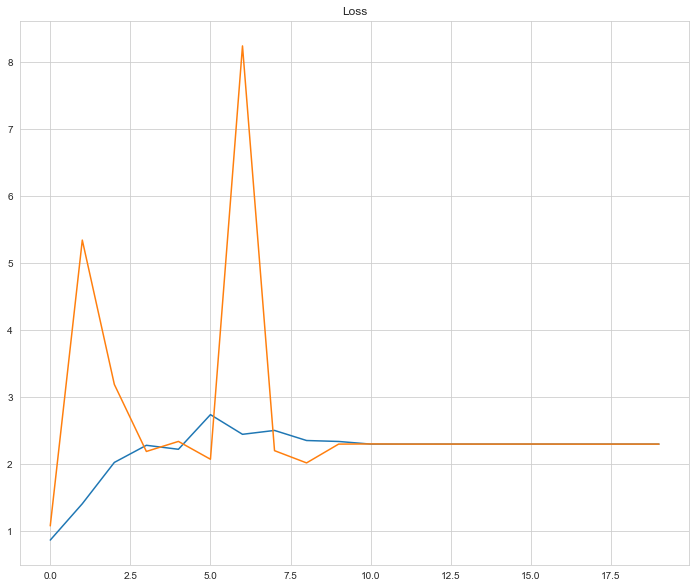

In [26]:
plt.figure(figsize=(12, 10))
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss")

In [ ]:
import tensorflow as tf

tf.__version__